In [70]:
import nlopt
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from optlib import optical as opt
import pickle

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 16
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [2]:
xraypath = '../Henke/'
oscpath = '../OscillatorsLibrary/'

In [3]:
fd = pd.read_csv('/Users/olgaridzel/Research/olga-optical-data/tpp_data.dat',sep='\t',header=None)
tpp_data = fd.values
tpp = np.loadtxt('tpp2m_formula_newdata.dat',skiprows=1)

*To save class object*

In [7]:
with open(oscpath + 'Insulators/pmma_drude_no_dispersion.pkl', 'wb') as output:
    pickle.dump(pmma_drude, output, pickle.HIGHEST_PROTOCOL)

*To load class object*

In [4]:
with open(oscpath + 'Insulators/pmma_drude_full_dispersion.pkl', 'rb') as input:
    pmma_drude = pickle.load(input)
pmma_drude.q_dependency = None
pmma_drude.oscillators.alpha = 1

In [72]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [73]:
opt_ = opt.OptFit(pmma_drude, x_exp, y_exp, 1600)

In [74]:
result = opt_.runOptimisation(fitGoal = 'ndiimfp', maxeval = 1000, xtol_rel = 1e-6)

In [67]:
oscOptimised = opt_.vec2Struct(result)

In [68]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [23.73283783 84.45743258 50.76832541 23.8128708  33.33115837 11.34716495
 44.06999242 56.85032065  7.92626158  9.77017969  9.51602777 10.74601839
  9.29463095  8.04581006  7.94152265]
Gamma: [ 1.3476009   3.33869299  2.30555997  5.264724    4.64930273  5.16709871
  8.60038911  7.19970972 25.76025129 33.98654255 88.27899621 90.01282605
 97.7541679  64.0352837  95.10036766]
Omega: [ 8.18354654  9.07949504  8.99228418 13.97248565 12.63665213 14.72609874
 26.82441266 19.3734184  30.62332549 32.14729609 35.53902167 86.22460418
 67.11686251 97.01480835 97.60796677]


In [69]:
with open(oscpath + f'Insulators/{oscOptimised.name}_{oscOptimised.oscillators.model}_full_dispersion.pkl', 'wb') as output:
    pickle.dump(oscOptimised, output, pickle.HIGHEST_PROTOCOL)

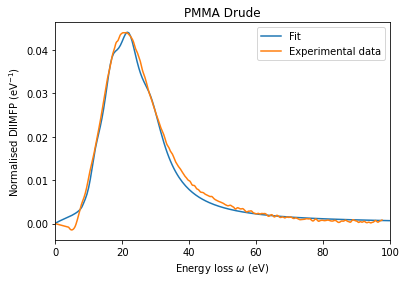

In [70]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [26]:
fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.3953550334984537
Z = 3.6
KKSum = 1.137248409514163


In [21]:
with open(oscpath + 'Insulators/pmma_drude_no_dispersion.pkl', 'rb') as input:
    pmma_drude_no_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/pmma_drude_full_dispersion.pkl', 'rb') as input:
    pmma_drude_full_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/pmma_drude_q_dispersion.pkl', 'rb') as input:
    pmma_drude_q_dispersion = pickle.load(input)

E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))

pmma_drude_q_dispersion.calculateIMFP(E0,isMetal=False)
pmma_drude_no_dispersion.calculateIMFP(E0,isMetal=False)
pmma_drude_full_dispersion.calculateIMFP(E0,isMetal=False)

<IPython.core.display.Javascript object>


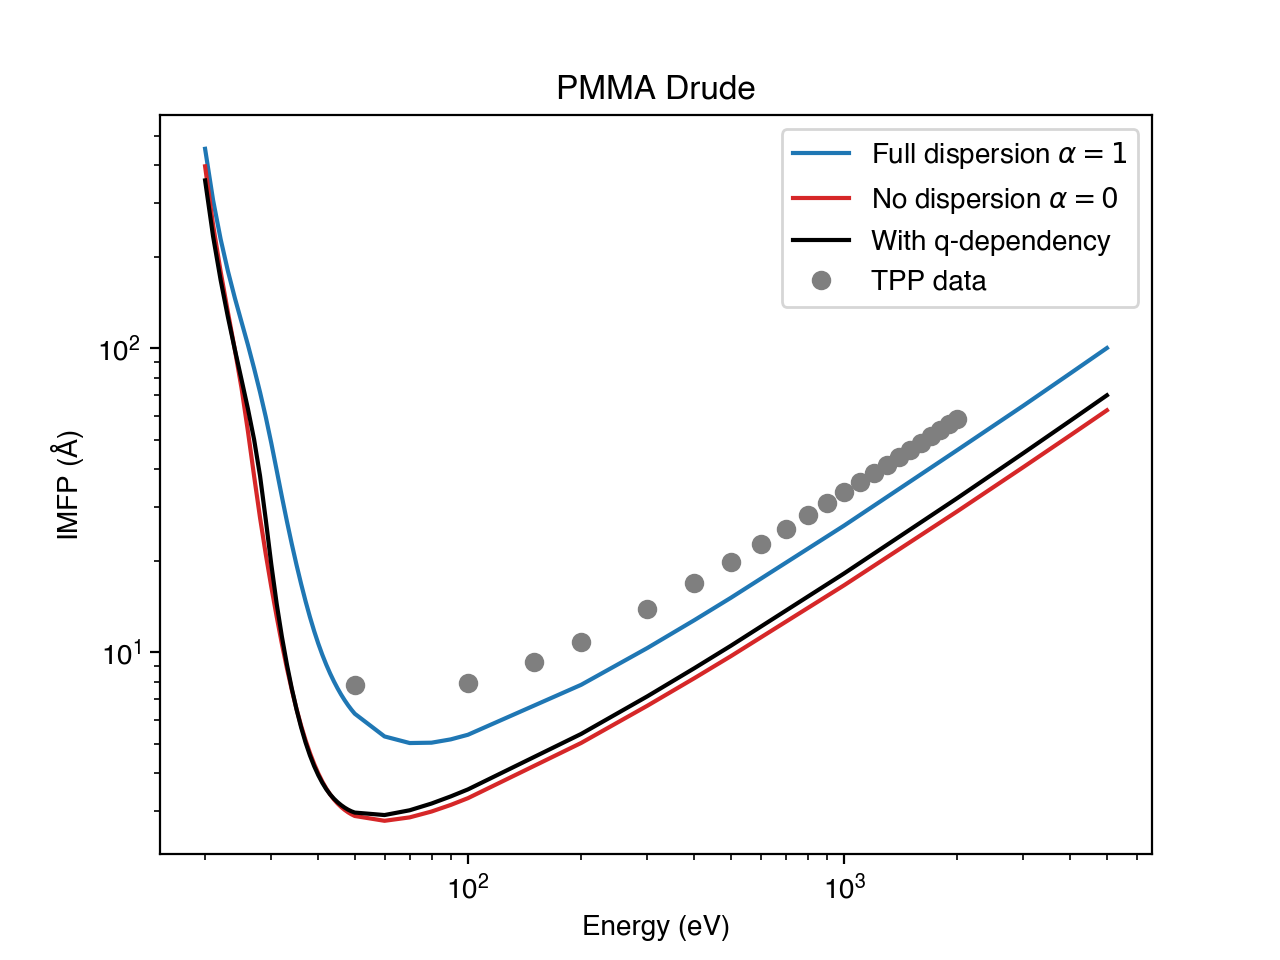

In [23]:
plt.figure()
plt.plot(E0, pmma_drude_full_dispersion.IMFP,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(E0, pmma_drude_no_dispersion.IMFP,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(E0, pmma_drude_q_dispersion.IMFP,label='With q-dependency',color='black')
plt.plot(tpp_data[:,0],tpp_data[:,12],'o',label='TPP data',color='tab:gray')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(f'{pmma_drude_q_dispersion.name} {pmma_drude_q_dispersion.oscillators.model}')
plt.show()

In [24]:
plt.savefig('pmma_imfp.png', dpi=600)

<IPython.core.display.Javascript object>


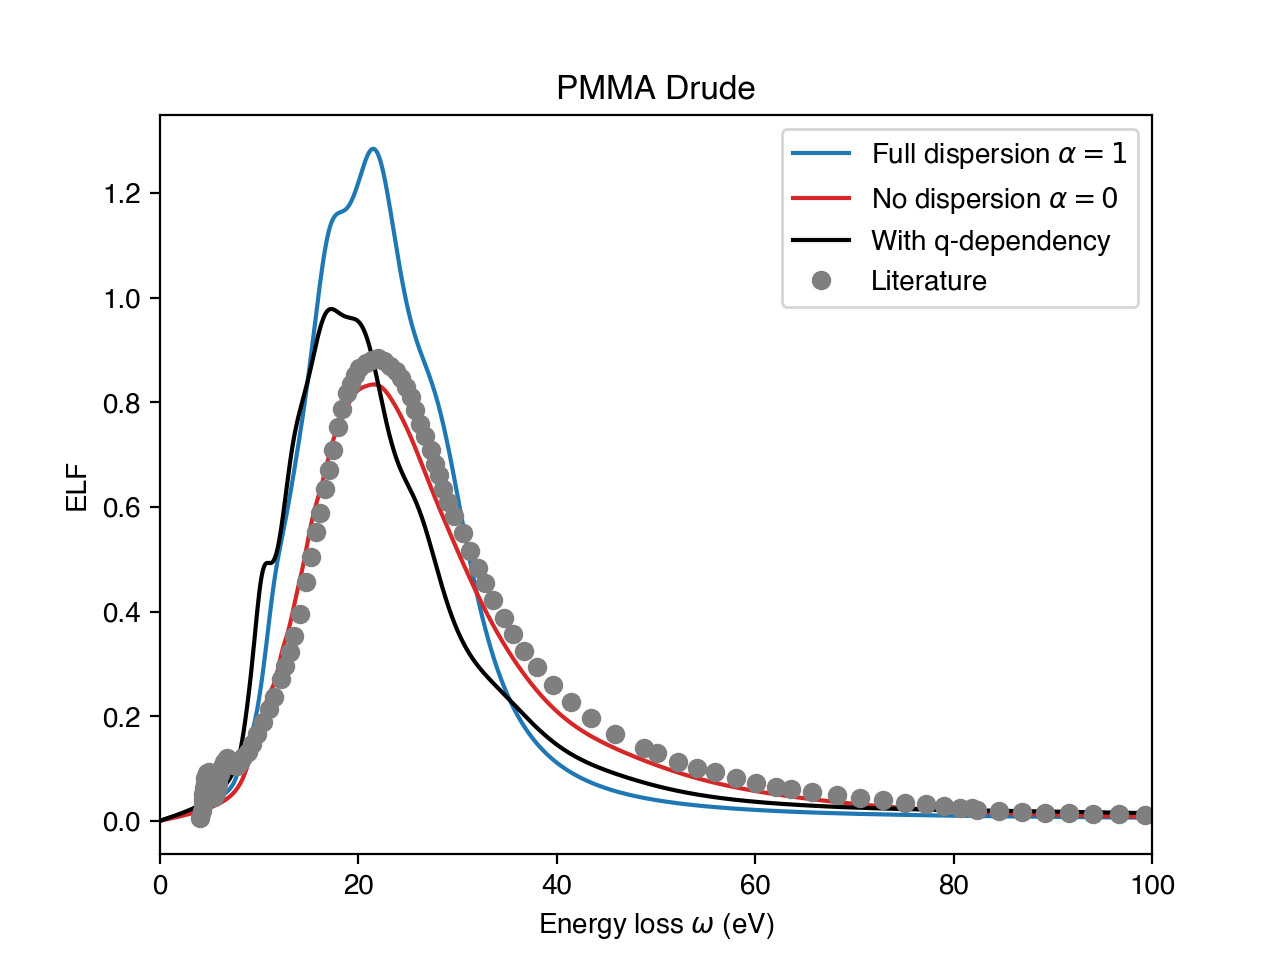

In [17]:
fd = pd.read_csv('../../MATLAB/organic/dna/dna_physdat_die.txt',header=None,sep=' ')
exp_elf = fd.values

with open(oscpath + 'Insulators/pmma_drude_no_dispersion.pkl', 'rb') as input:
    pmma_drude_no_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/pmma_drude_full_dispersion.pkl', 'rb') as input:
    pmma_drude_full_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/pmma_drude_q_dispersion.pkl', 'rb') as input:
    pmma_drude_q_dispersion = pickle.load(input)

pmma_drude_q_dispersion.calculateELF()
pmma_drude_no_dispersion.calculateELF()
pmma_drude_full_dispersion.calculateELF()

plt.figure()
plt.plot(pmma_drude_full_dispersion.eloss,pmma_drude_full_dispersion.ELF,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(pmma_drude_no_dispersion.eloss,pmma_drude_no_dispersion.ELF,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(pmma_drude_q_dispersion.eloss,pmma_drude_q_dispersion.ELF,label='With q-dependency',color='black')
plt.plot(exp_elf[:,0],exp_elf[:,3],'o',label='Literature',color='tab:gray')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{pmma_drude_q_dispersion.name} {pmma_drude_q_dispersion.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

In [18]:
plt.savefig('pmma_elf.png',dpi=600)

**PTFE**

In [50]:
with open(oscpath + 'Insulators/ptfe_drude.pkl', 'rb') as input:
    ptfe_drude = pickle.load(input)
ptfe_drude.q_dependency = 1
ptfe_drude.oscillators.alpha = 0.15

In [51]:
fd = pd.read_csv('../diimfp/ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [52]:
opt_ptfe = opt.OptFit(ptfe_drude, x_exp, y_exp, 1600)

In [53]:
result_ptfe = opt_ptfe.runOptimisation(fitGoal = 'ndiimfp', maxeval=1000)

In [54]:
oscOptimised_ptfe = opt_ptfe.vec2Struct(result_ptfe)

In [55]:
print(f'A: {oscOptimised_ptfe.oscillators.A}')
print(f'Gamma: {oscOptimised_ptfe.oscillators.gamma}')
print(f'Omega: {oscOptimised_ptfe.oscillators.omega}')

A: [  1.55590216   8.36971367  62.99903328  12.02308477  45.87379102
 121.08991641 150.45140478 130.31109845 115.40971219]
Gamma: [ 0.64167873  0.75184168  3.37919241  3.54644884  3.75590504 13.07882415
 22.43574088 32.06070904 99.29672567]
Omega: [  7.65154374  11.09429699  13.84977955  12.02822672  18.86735043
  25.30594404  38.93221155  58.84018472 142.54994595]


In [56]:
with open(oscpath + f'Insulators/{oscOptimised_ptfe.name}_{oscOptimised_ptfe.oscillators.model}_q_dispersion.pkl', 'wb') as output:
    pickle.dump(oscOptimised_ptfe, output, pickle.HIGHEST_PROTOCOL)

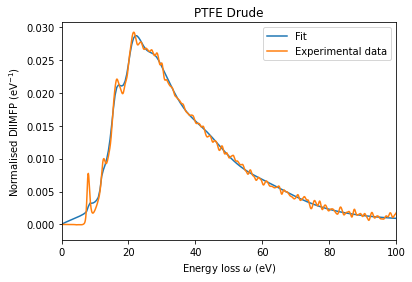

In [57]:
oscOptimised_ptfe.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised_ptfe.DIIMFP_E,oscOptimised_ptfe.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised_ptfe.name} {oscOptimised_ptfe.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [58]:
fsum = oscOptimised_ptfe.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised_ptfe.Z))

kksum = oscOptimised_ptfe.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 7.448485645366241
Z = 8
KKSum = 1.009724429590669


In [5]:
with open(oscpath + 'Insulators/ptfe_drude_no_dispersion.pkl', 'rb') as input:
    ptfe_drude_no_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/PTFE_Drude_full_dispersion.pkl', 'rb') as input:
    ptfe_drude_full_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/PTFE_Drude_q_dispersion.pkl', 'rb') as input:
    ptfe_drude_q_dispersion = pickle.load(input)

E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))

# oscOptimised_ptfe.calculateIMFP(E0,isMetal=False)
ptfe_drude_q_dispersion.calculateIMFP(E0,isMetal=False)
ptfe_drude_no_dispersion.calculateIMFP(E0,isMetal=False)
ptfe_drude_full_dispersion.calculateIMFP(E0,isMetal=False)

<IPython.core.display.Javascript object>


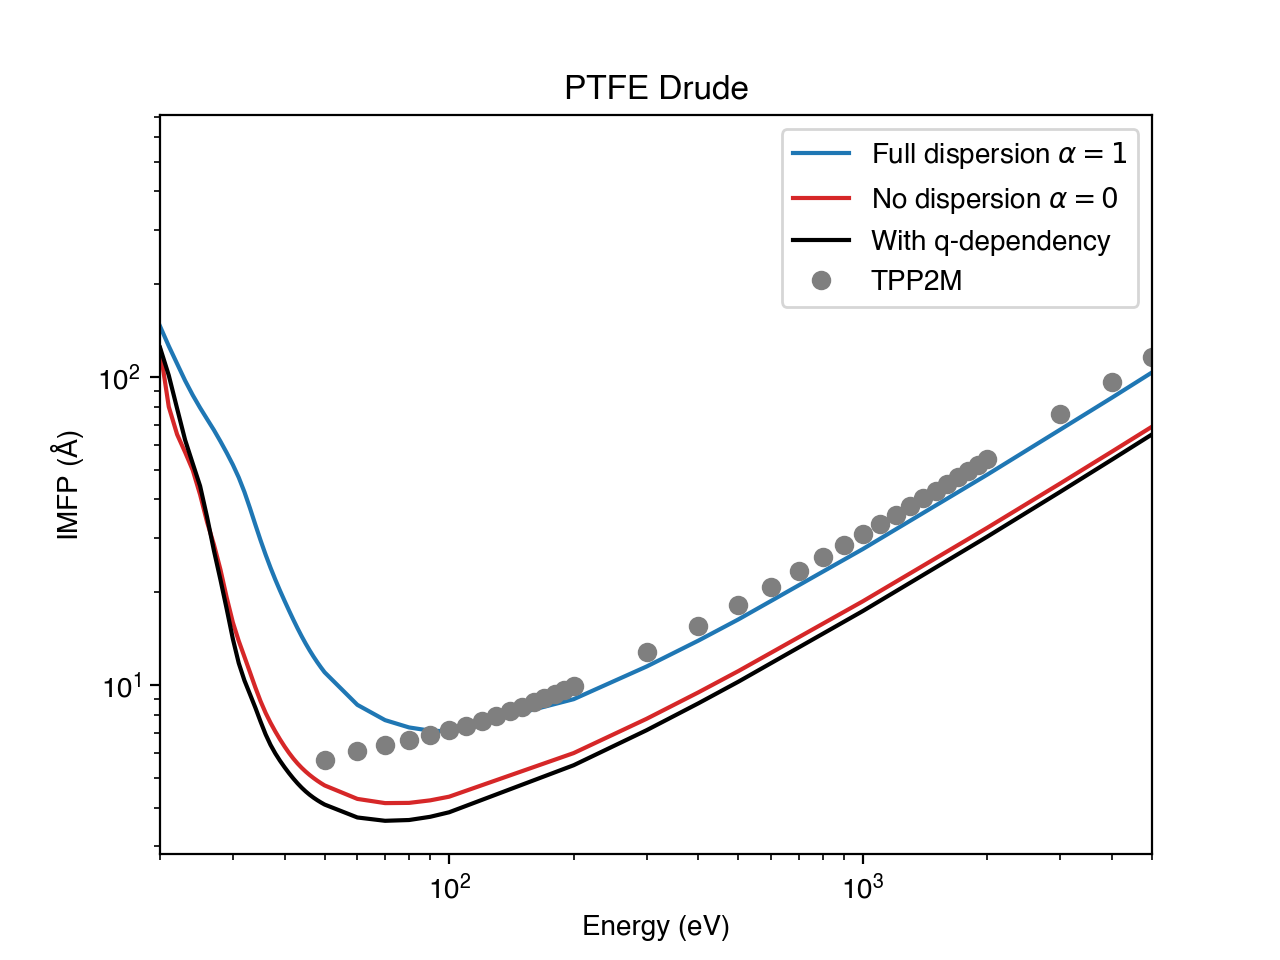

In [15]:
plt.figure()
plt.plot(E0, ptfe_drude_full_dispersion.IMFP,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(E0, ptfe_drude_no_dispersion.IMFP,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(E0, ptfe_drude_q_dispersion.IMFP,label='With q-dependency',color='black')
# plt.plot(E0, oscOptimised_ptfe.IMFP,label='With q-dependency',color='black')
plt.plot(tpp[::10,0],tpp[::10,1],'o',label='TPP2M',color='tab:gray')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlim(20, 5000)
plt.title(f'{ptfe_drude_full_dispersion.name} {ptfe_drude_full_dispersion.oscillators.model}')
plt.show()

In [16]:
plt.savefig('ptfe_imfp.png',dpi=600)

**Al**

In [79]:
A = [217, 75.7, 8.70, 8.57]
gamma = [0.33, 17.5, 99.6, 74.6]
omega = [4.11, 55.29, 13.3, 142.5]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0.7)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.5)
q = 0

M = 26.9815386 # Molar weight
rho = 2.6989 # g/cm3
N_Avogadro = 6.02217e23 

al_drude = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_drude.Ef = 11.2
al_drude.atomic_density = rho * N_Avogadro / M *1e-24
al_drude.static_refractive_index = np.Inf
al_drude.electron_density = 0.2249
al_drude.omega_pl = np.sqrt(4*math.pi*al_drude.electron_density*opt.a0**3) * opt.h2ev
al_drude.Z = 13
al_drude.q_dependency = None

In [80]:
fd = pd.read_csv('../diimfp/al_diimfp.dat',sep=' ')
exp_diimfp = fd.values
x_exp = exp_diimfp[:,1]
y_exp = exp_diimfp[:,3]

In [6]:
alPalik = np.loadtxt('/Users/olgaridzel/Research/Bruce/PHYSDAT/opt/pal/al.diel')
x_exp = alPalik[:,0]
y_exp = alPalik[:,3]

In [83]:
with open(oscpath + 'Metals/Al_Drude_q_dispersion.pkl', 'rb') as input:
    al_drude = pickle.load(input)

In [84]:
opt_al = opt.OptFit(al_drude, x_exp, y_exp, 3400)

In [85]:
result_al = opt_al.runOptimisation(fitGoal = 'ndiimfp', maxeval=1000)
# result_al = opt_al.runOptimisation(fitGoal = 'elf', maxeval=10000, xtol_rel=1e-8)

In [86]:
oscOptimised_al = opt_al.vec2Struct(result_al)

In [87]:
print(f'A: {oscOptimised_al.oscillators.A}')
print(f'Gamma: {oscOptimised_al.oscillators.gamma}')
print(f'Omega: {oscOptimised_al.oscillators.omega}')

A: [195.63100272  18.51935733  79.55595045   9.92917376   6.62095643]
Gamma: [ 0.56566684  4.49979565  3.0102946  93.37566141 31.70144891]
Omega: [ 6.74247487  4.11719958 25.09943602  5.33284399 25.0607311 ]


In [63]:
with open(oscpath + f'Metals/{oscOptimised_al.name}_{oscOptimised_al.oscillators.model}_q_dispersion.pkl', 'wb') as output:
    pickle.dump(oscOptimised_al, output, pickle.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


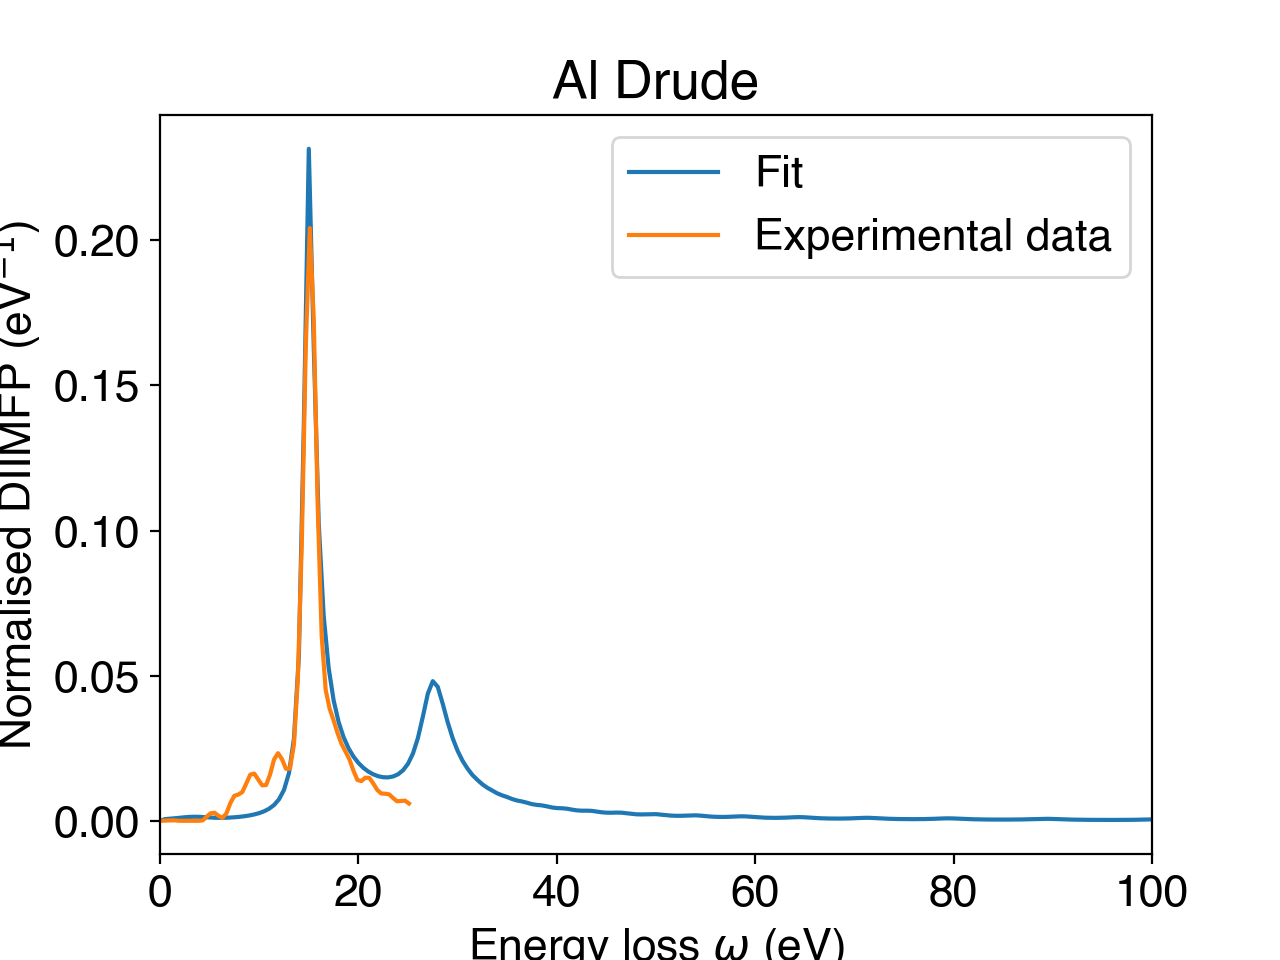

In [88]:
oscOptimised_al.calculateDIIMFP(opt_al.E0)
# oscOptimised_al.calculateELF()

plt.figure()
plt.plot(oscOptimised_al.DIIMFP_E,oscOptimised_al.DIIMFP,label='Fit')
# plt.plot(oscOptimised_al.eloss,oscOptimised_al.ELF,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised_al.name} {oscOptimised_al.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [62]:
fsum = oscOptimised_al.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised_al.Z))

kksum = oscOptimised_al.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 12.812777263260235
Z = 13
KKSum = 0.9555465065847201


In [64]:
E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))

with open(oscpath + 'Metals/Al_Drude_q_dispersion.pkl', 'rb') as input:
    al_drude_q_dispersion = pickle.load(input)
with open(oscpath + 'Metals/Al_Drude_full_dispersion.pkl', 'rb') as input:
    al_drude_full_dispersion = pickle.load(input)
with open(oscpath + 'Metals/Al_Drude_no_dispersion.pkl', 'rb') as input:
    al_drude_no_dispersion = pickle.load(input)
with open(oscpath + 'Metals/Al_Drude_optical.pkl', 'rb') as input:
    al_drude_optical = pickle.load(input)

al_drude_q_dispersion.calculateIMFP(E0,isMetal=True)
al_drude_full_dispersion.calculateIMFP(E0,isMetal=True)
al_drude_no_dispersion.calculateIMFP(E0,isMetal=True)
al_drude_optical.calculateIMFP(E0,isMetal=True)

In [65]:
tpp_al = np.loadtxt('/Users/olgaridzel/Research/Bruce/PHYSDAT/dbi/diel/imfp/tpp/al.iimfp',skiprows=1)

<IPython.core.display.Javascript object>


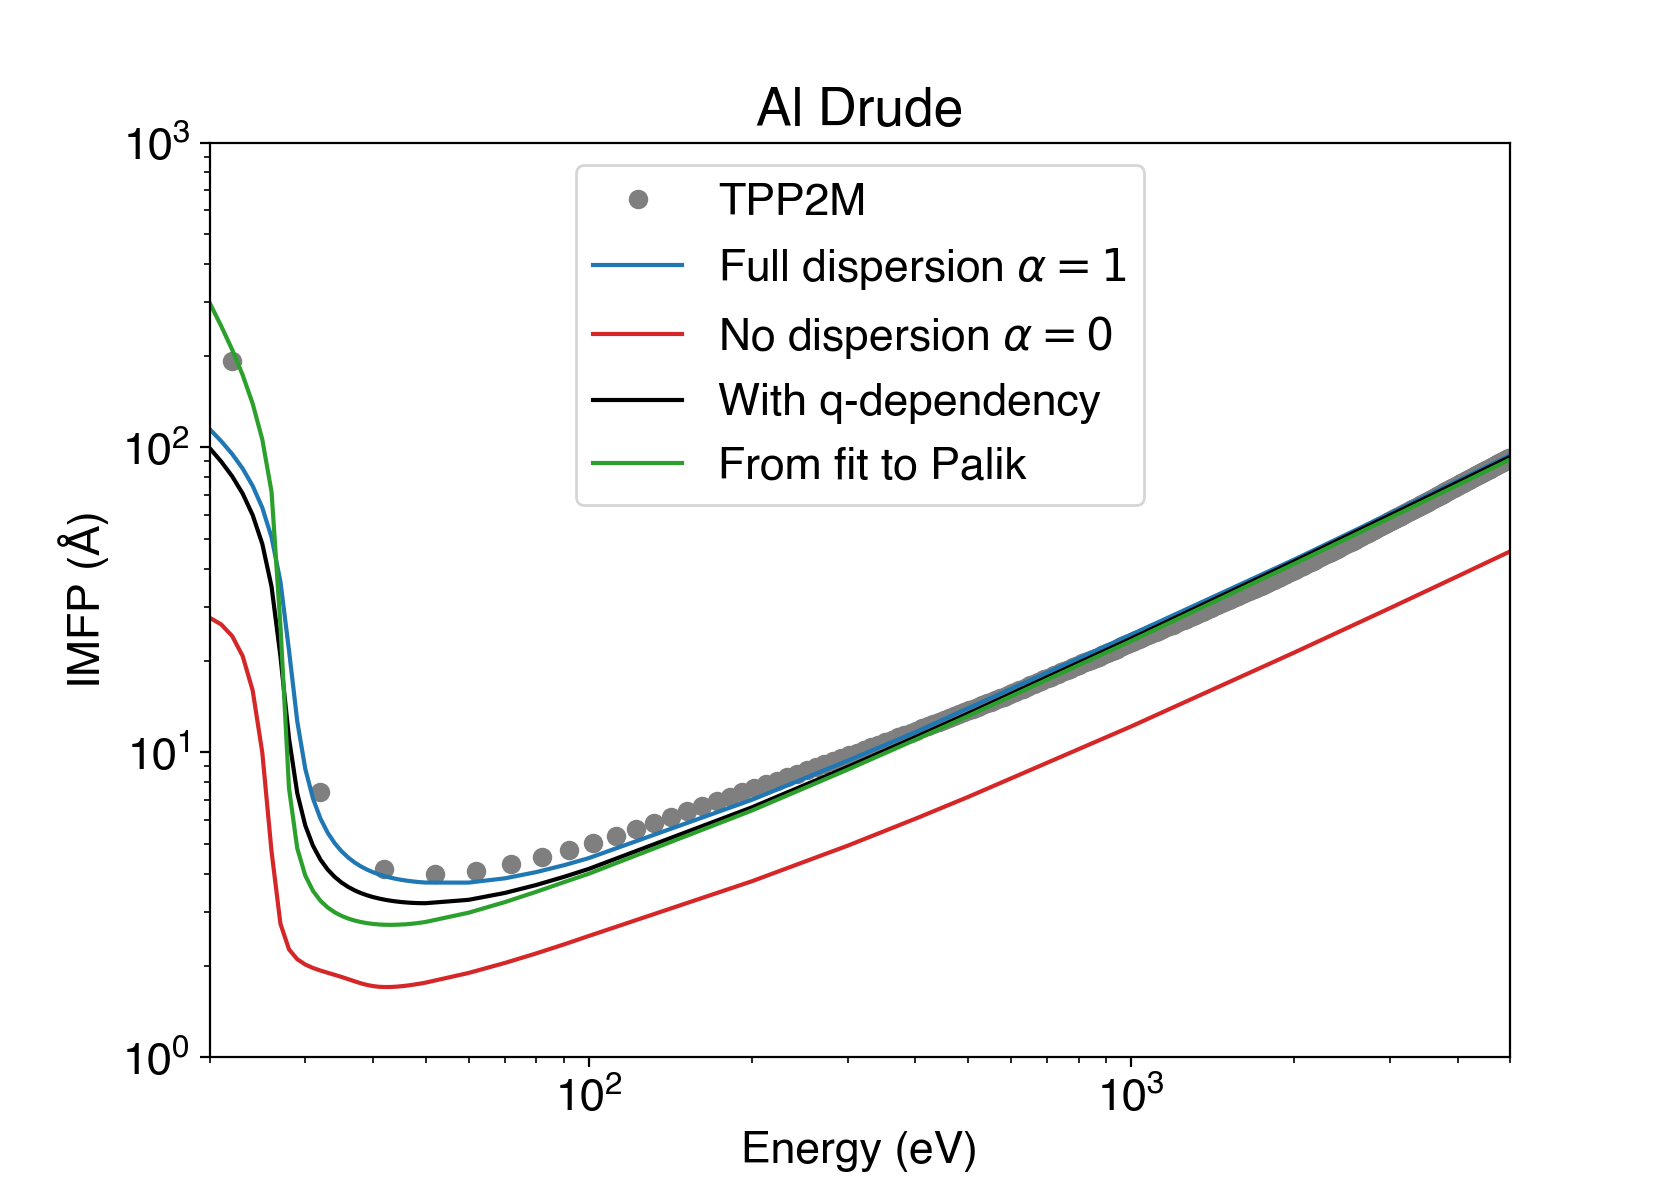

In [71]:
plt.figure()
plt.plot(tpp_al[::10,0],tpp_al[::10,1],'o',label='TPP2M',color='tab:gray')
plt.plot(E0, al_drude_full_dispersion.IMFP,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(E0, al_drude_no_dispersion.IMFP,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(E0, al_drude_q_dispersion.IMFP,label='With q-dependency',color='black')
plt.plot(E0, al_drude_optical.IMFP,label='From fit to Palik',color='tab:green')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlim(20, 5000)
plt.ylim(1,1000)
plt.title(f'{al_drude_q_dispersion.name} {al_drude_q_dispersion.oscillators.model}')
plt.show()

In [72]:
plt.savefig('al_imfp.png',dpi=600)

<IPython.core.display.Javascript object>


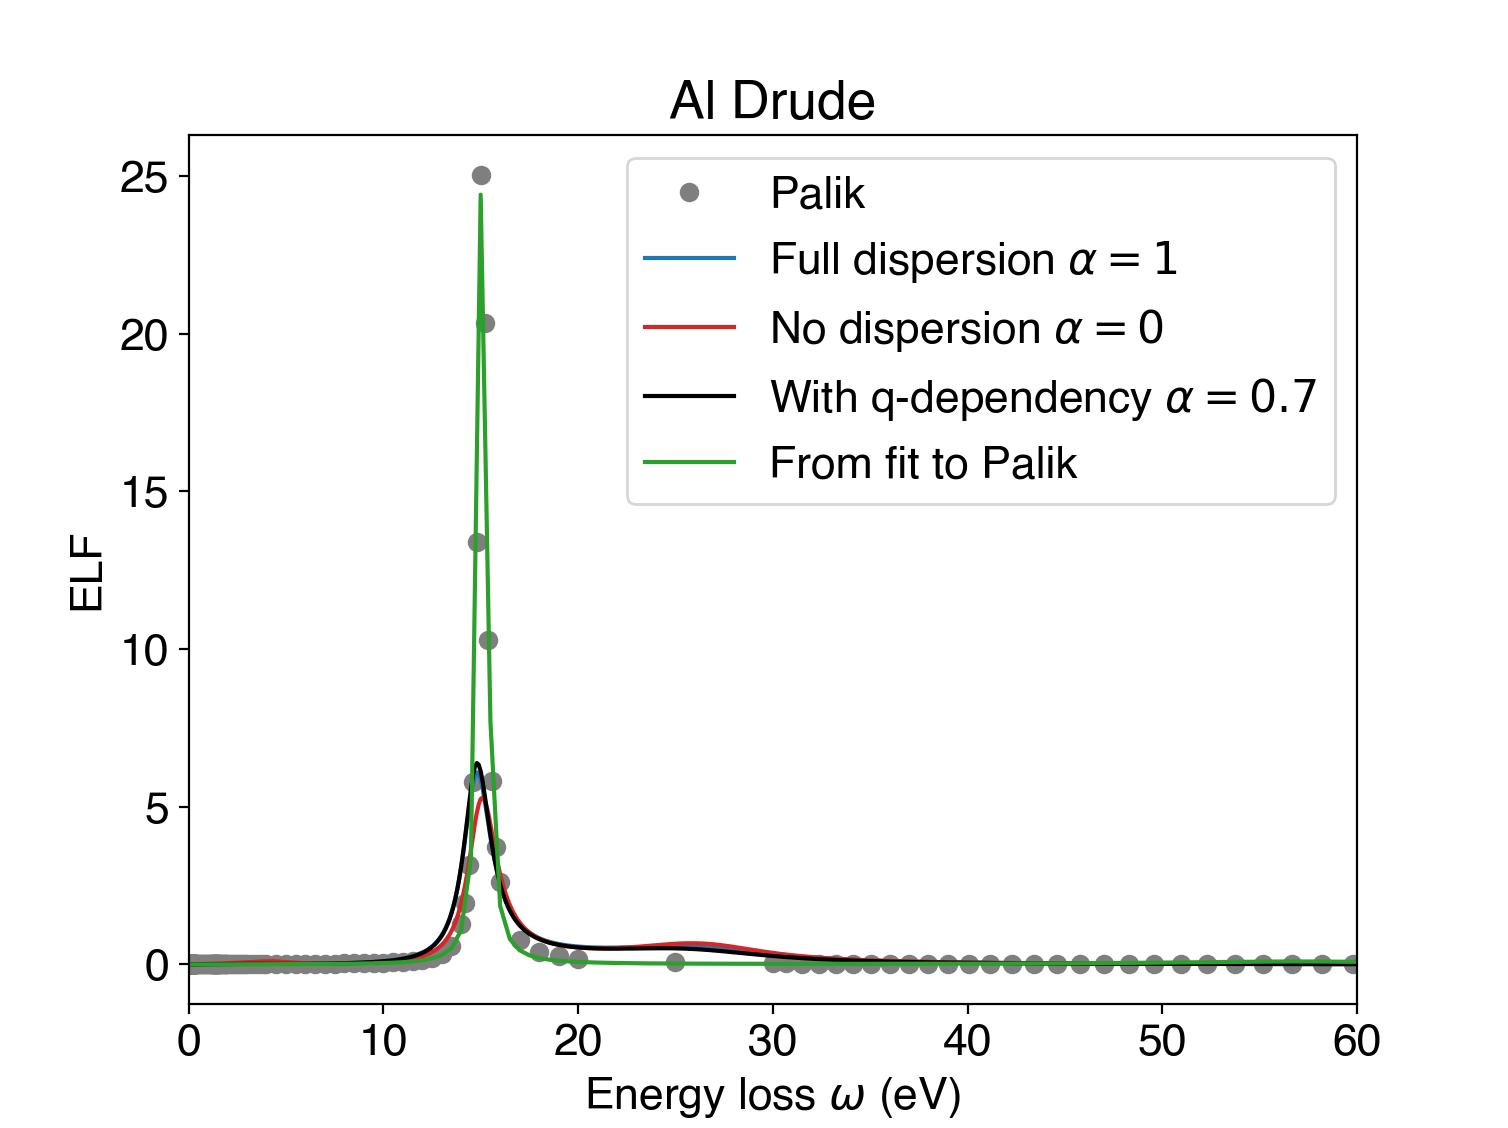

In [77]:
al_drude_q_dispersion.eloss = opt.linspace(0,100,0.1)
al_drude_q_dispersion.calculateELF()
al_drude_no_dispersion.eloss = opt.linspace(0,100,0.1)
al_drude_no_dispersion.calculateELF()
al_drude_full_dispersion.eloss = opt.linspace(0,100,0.1)
al_drude_full_dispersion.calculateELF()
al_drude_optical.eloss = opt.linspace(0,100,0.5)
al_drude_optical.calculateELF()

plt.figure()
plt.plot(alPalik[:,0],alPalik[:,3],'o',label='Palik',color='tab:gray')
plt.plot(al_drude_full_dispersion.eloss,al_drude_full_dispersion.ELF,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(al_drude_no_dispersion.eloss,al_drude_no_dispersion.ELF,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(al_drude_q_dispersion.eloss,al_drude_q_dispersion.ELF,label='With q-dependency $\\alpha = 0.7$',color='black')
plt.plot(al_drude_optical.eloss,al_drude_optical.ELF,label='From fit to Palik',color='tab:green')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{al_drude_q_dispersion.name} {al_drude_q_dispersion.oscillators.model}')
plt.xlim(0,60)
plt.legend()
plt.show()

In [78]:
plt.savefig('al_elf.png',dpi=600)